In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



In [ ]:
# Load dataset
data = pd.read_csv("Data_T4_2023.csv")  # Update the file path as needed



<ipython-input-3-4b2e0ed69e91>:2: DtypeWarning: Columns (21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("Data_T4_2023.csv")  # Update the file path as needed


In [ ]:
# Part 1: Data Exploration
print(f"Dataset dimensions: {data.shape}")
print("Column names and types:\n", data.dtypes)




Dataset dimensions: (67444, 41)
Column names and types:
 Y_Quarter                     int64
Year                          int64
Quarter                       int64
Region                       object
HH_Id                         int64
Member_Number                 int64
Relationship                 object
Gender                       object
Age                           int64
Civil_Status                 object
Attend_edu_trai_cycle        object
Edu_cycle                    object
Edu_Year                    float64
Literacy                     object
Educa_Level                  object
Edu_Comp_Year               float64
Edu_Degr_Diploma             object
Year_Of_Diploma             float64
Unstructured_Educational     object
Paid_Work_7d                 object
Unpaid_Work                  object
Agric_Work                   object
Sale_or_Self_cons            object
Reason_Not_Work              object
Look_for_Work                object
Procedure_Look               object
Reason_

In [ ]:
# Display the first and last 5 rows
print("First 5 rows:\n", data.head())
print("Last 5 rows:\n", data.tail())


First 5 rows:
    Y_Quarter  Year  Quarter       Region  HH_Id  Member_Number  \
0      20234  2023        4  Grand Tunis      1              1   
1      20234  2023        4  Grand Tunis      2              4   
2      20234  2023        4  Grand Tunis      2              3   
3      20234  2023        4  Grand Tunis      2              1   
4      20234  2023        4  Grand Tunis      2              2   

            Relationship    Gender  Age Civil_Status  ... Occupation  \
0  1- Head of the family  2.Female   90      3.Widow  ...        NaN   
1    3- Son/daughter (1)    1.Male   15     1.Single  ...        NaN   
2    3- Son/daughter (1)  2.Female   10     1.Single  ...        NaN   
3  1- Head of the family    1.Male   46    2.Married  ...    42240.0   
4      2-       Wife (1)  2.Female   46    2.Married  ...        NaN   

  Status_Work  Social_Fund Environment Sector_of_Activity_2  \
0         NaN          NaN     1.Urban                  NaN   
1         NaN          NaN   

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values per column:\n", missing_values)


Missing values per column:
 Y_Quarter                       0
Year                            0
Quarter                         0
Region                          0
HH_Id                           0
Member_Number                   0
Relationship                    0
Gender                          0
Age                             0
Civil_Status                    0
Attend_edu_trai_cycle        2237
Edu_cycle                   48901
Edu_Year                    50985
Literacy                    20771
Educa_Level                 30448
Edu_Comp_Year               30801
Edu_Degr_Diploma            31384
Year_Of_Diploma             57316
Unstructured_Educational    31199
Paid_Work_7d                16266
Unpaid_Work                 34860
Agric_Work                  67216
Sale_or_Self_cons           67242
Reason_Not_Work             35035
Look_for_Work               35363
Procedure_Look              63661
Reason_Not_Looking          39145
Desire_to_Work              39020
Ready_Available     

In [ ]:

# Check for duplicate rows
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")



Number of duplicate rows: 0


In [ ]:
# Part 2A: Voluntary Unemployed
# Unique values in 'Desire_to_Work'
unique_values = data['Desire_to_Work'].unique()
value_counts = data['Desire_to_Work'].value_counts()
print(f"Unique values in 'Desire_to_Work': {unique_values}")
print("Frequency of unique values:\n", value_counts)


Unique values in 'Desire_to_Work': ['2.No' nan '1.Yes']
Frequency of unique values:
 Desire_to_Work
2.No     27076
1.Yes     1348
Name: count, dtype: int64


In [ ]:

# Handle missing and inconsistent values in 'Desire_to_Work'
data['Desire_to_Work'] = data['Desire_to_Work'].replace({
    "2.No": "No",
    "1.Yes": "Yes",
    # If there are more inconsistent values, handle them here
})
data['Desire_to_Work'].fillna('Not specified', inplace=True)
print("Updated Desire_to_Work:\n", data['Desire_to_Work'].head())


Updated Desire_to_Work:
 0               No
1               No
2    Not specified
3    Not specified
4    Not specified
Name: Desire_to_Work, dtype: object


<ipython-input-10-a06bbc79ae6f>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Desire_to_Work'].fillna('Not specified', inplace=True)


In [ ]:

# Extract individuals aged between 25 and 29 who do not wish to work
voluntary_unemployed = data[
    (data['Age'] >= 25) & (data['Age'] <= 29) & (data['Desire_to_Work'] == 'No')
][['Age', 'Civil_Status', 'Environment', 'Desire_to_Work']]



In [ ]:
# Ensure there are data points before saving to CSV
if not voluntary_unemployed.empty:
    voluntary_unemployed.to_csv("chomeurs_volontaires.csv", index=False)
    print("Voluntary unemployed data saved to chomeurs_volontaires.csv")
else:
    print("No voluntary unemployed data found for individuals aged 25-29 who do not wish to work.")


Voluntary unemployed data saved to chomeurs_volontaires.csv


In [ ]:

# Distribution of civil status
civil_status_dist = voluntary_unemployed['Civil_Status'].value_counts()
print("Civil Status Distribution in voluntary unemployed:\n", civil_status_dist)


Civil Status Distribution in voluntary unemployed:
 Civil_Status
2.Married     474
1.Single      432
4.Divorced      9
3.Widow         4
Name: count, dtype: int64


In [ ]:

# Preferred environments
environment_dist = voluntary_unemployed['Environment'].value_counts()
print("Preferred Environments:\n", environment_dist)


Preferred Environments:
 Environment
1.Urban    523
2.Rural    396
Name: count, dtype: int64


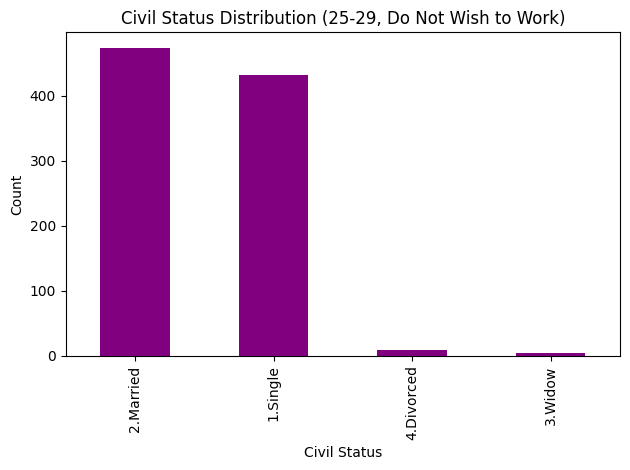

In [ ]:

# Visualize Civil Status distribution if data is available
if not civil_status_dist.empty:
    civil_status_dist.plot(kind='bar', color='purple')
    plt.title('Civil Status Distribution (25-29, Do Not Wish to Work)')
    plt.xlabel('Civil Status')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()


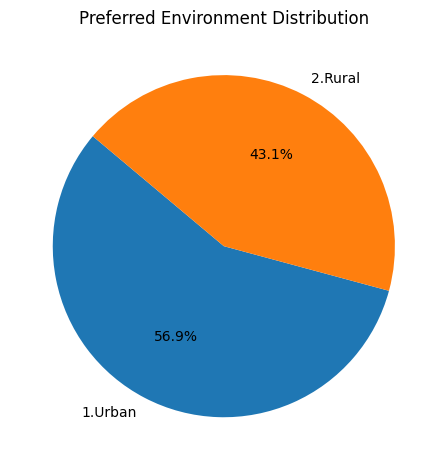

In [ ]:

# Visualize Environment distribution if data is available
if not environment_dist.empty:
    environment_dist.plot(kind='pie', autopct='%1.1f%%', startangle=140)
    plt.title('Preferred Environment Distribution')
    plt.ylabel('')
    plt.tight_layout()
    plt.show()


In [ ]:

# Part 2B: Demographic and Educational Data
# Count unique regions
unique_regions = data['Region'].nunique()
print(f"Number of unique regions: {unique_regions}")


Number of unique regions: 7


In [ ]:
# Analyze education levels
education_dist = data['Educa_Level'].value_counts()
print("Education Level Distribution:\n", education_dist)


Education Level Distribution:
 Educa_Level
2.Primary School (Old System)           10647
5.Basic school                           8009
3.Secondary School (Old System)          7193
7.Public Higher Education                5398
6.Secondary School (New)                 5174
1.Koranic School                          240
4.Vocational Education (preparatory)      193
9.Adult education                          96
8.Private Higher Education                 29
0.Nothing                                  17
Name: count, dtype: int64


In [ ]:
# Create grouped education levels
education_mapping = {
    "None": "Low",
    "Primary": "Low",
    "Secondary": "Medium",
    "Higher": "High"
}
data['Educa_Level_Grouped'] = data['Educa_Level'].map(education_mapping)
print("Grouped Education Levels:\n", data['Educa_Level_Grouped'].value_counts())


Grouped Education Levels:
 Series([], Name: count, dtype: int64)


In [ ]:
# Clean dataset by removing rows with missing critical information
critical_columns = ['Age', 'Region', 'Weight']
cleaned_data = data.dropna(subset=critical_columns)
print(f"Cleaned dataset dimensions: {cleaned_data.shape}")



Cleaned dataset dimensions: (67444, 42)


In [ ]:
# Save the cleaned dataset
cleaned_data.to_csv("Cleaned_Data_T4_2023.csv", index=False)
print("Cleaned data saved to Cleaned_Data_T4_2023.csv")

Cleaned data saved to Cleaned_Data_T4_2023.csv
